<a href="https://colab.research.google.com/github/AjmiyaSalim/penguin-species-nb-classification/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Introduction

###  Dataset Overview:
The dataset used in this project is the **"Penguins Binary Classification"** dataset, derived from the Palmer Archipelago (Antarctica) penguins data. It includes biometric features of penguins such as:

- **Bill Length (mm)**
- **Bill Depth (mm)**
- **Flipper Length (mm)**
- **Body Mass (g)**
- **Year** of observation

The target variable is the **species**, which is used for binary classification. This dataset is ideal for practicing classification techniques and understanding the relationship between biological measurements and species identification.

---

###  Naive Bayes Classifier:
The **Naive Bayes classifier** is a probabilistic machine learning algorithm based on **Bayes’ Theorem**, with the "naive" assumption that all input features are independent.

####  Key Features:
- **Simple and fast**: Works well even with small datasets.
- **Probabilistic model**: Predicts class probabilities for better interpretability.
- **Effective for binary and multiclass classification problems**
- Performs well when the assumption of independence holds true.

In this project, we will use the **Gaussian Naive Bayes** model, which is suitable for continuous input features that follow a normal (Gaussian) distribution.

---



In [4]:
import pandas as pd
data=pd.read_csv('/content/penguins_binary_classification.csv')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009


In [5]:
# To display the first few rows of dataset
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


In [6]:
# To display the last few rows of dataset
data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009
273,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,2009


In [7]:
data.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
year,int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


In [9]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693,2008.043796
std,5.195566,2.013410,15.047938,835.933105,0.806281
min,32.100000,13.100000,172.000000,2850.000000,2007.000000
25%,38.350000,15.000000,190.000000,3600.000000,2007.000000
50%,42.000000,17.000000,198.000000,4262.500000,2008.000000
75%,46.675000,18.500000,215.000000,4950.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [10]:
data.isna().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
year,0


In [11]:
data['species'].value_counts()

,count
species,
Adelie,151
Gentoo,123


In [12]:
data['island'].value_counts()

,count
island,
Biscoe,167
Dream,56
Torgersen,51


We removed the **'island'** column using `data.drop()` since it may not provide significant value in predicting the species and could introduce unnecessary categorical noise into the model.


In [13]:
# Dropping the 'island' column as it is not needed for species prediction
data=data.drop(['island'],axis=1)

In [14]:
data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,39.1,18.7,181.0,3750.0,2007
1,Adelie,39.5,17.4,186.0,3800.0,2007
2,Adelie,40.3,18.0,195.0,3250.0,2007
3,Adelie,36.7,19.3,193.0,3450.0,2007
4,Adelie,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...
269,Gentoo,47.2,13.7,214.0,4925.0,2009
270,Gentoo,46.8,14.3,215.0,4850.0,2009
271,Gentoo,50.4,15.7,222.0,5750.0,2009
272,Gentoo,45.2,14.8,212.0,5200.0,2009


The dataset consists exclusively of two penguin species — **Adelie** and **Gentoo** — making it ideal for a **binary classification** problem.

To prepare the target variable for model training, we applied **Label Encoding**, which transforms categorical labels into numeric form required by machine learning algorithms:

- **Adelie** → `0`  
- **Gentoo** → `1`  

This conversion ensures that the classifier can interpret the species labels in a meaningful and computationally efficient way.

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

# Filtering the dataset to include only 'Adelie' and 'Gentoo' species for binary classification

data = data[data['species'].isin(['Adelie', 'Gentoo'])].copy()

# Encoding the target labels: 'Adelie' as 0 and 'Gentoo' as 1 (or vice versa)

data['species_encoded'] = le.fit_transform(data['species'])

In [16]:
data['species_encoded'].value_counts()

,count
species_encoded,
0,151
1,123


To proceed with model training, we separate the dataset into two parts:
- **X**: containing the input features (e.g., bill length, flipper length, body mass, etc.)
- **y**: containing the target variable (`species_encoded`), which represents the class labels.


In [17]:
y=data['species_encoded']
X=data.drop(['species'],axis=1)

## Data Visualization

Data visualization is a crucial step in any data science or machine learning workflow. It helps to:

- **Understand the data distribution**: Visualizing numeric features (like bill length, body mass, etc.) reveals patterns, outliers, and skewness.
- **Identify relationships**: Plots like pairplots or correlation heatmaps allow us to detect dependencies or correlations between variables.
- **Detect missing values or noise**: Heatmaps and bar plots can show incomplete or imbalanced data.
- **Guide preprocessing**: Visual insights help inform decisions like normalization, encoding, or feature selection.
- **Improve interpretability**: Well-designed visualizations make the data and model outcomes more accessible and easier to explain.



In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Set the aesthetic style of the plots to 'whitegrid' for better readability and visual appeal
sns.set(style="whitegrid")

/tmp/ipython-input-20-3550279570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=data, palette='Set2')


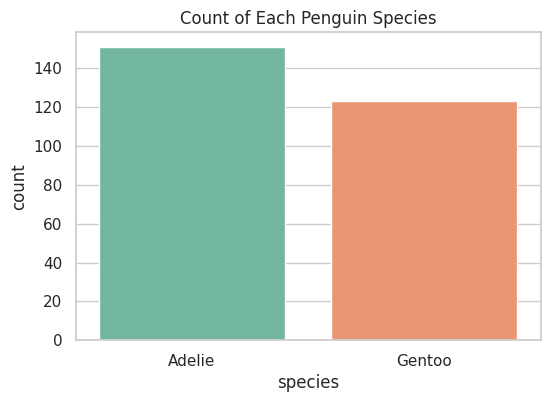

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=data, palette='Set2')
plt.title('Count of Each Penguin Species')
plt.show()

###  Pairplot: Visualizing Feature Relationships

The `pairplot` provides a comprehensive view of how each feature relates to the others. By setting:
- `hue='species'`, we differentiate Adelie and Gentoo visually.
- `diag_kind='kde'`, we use smooth density curves on the diagonal for better distribution visualization.
- `palette='husl'`, we apply a bright, perceptually uniform color palette.

This plot helps us visually assess which features are useful for distinguishing between the two penguin species.


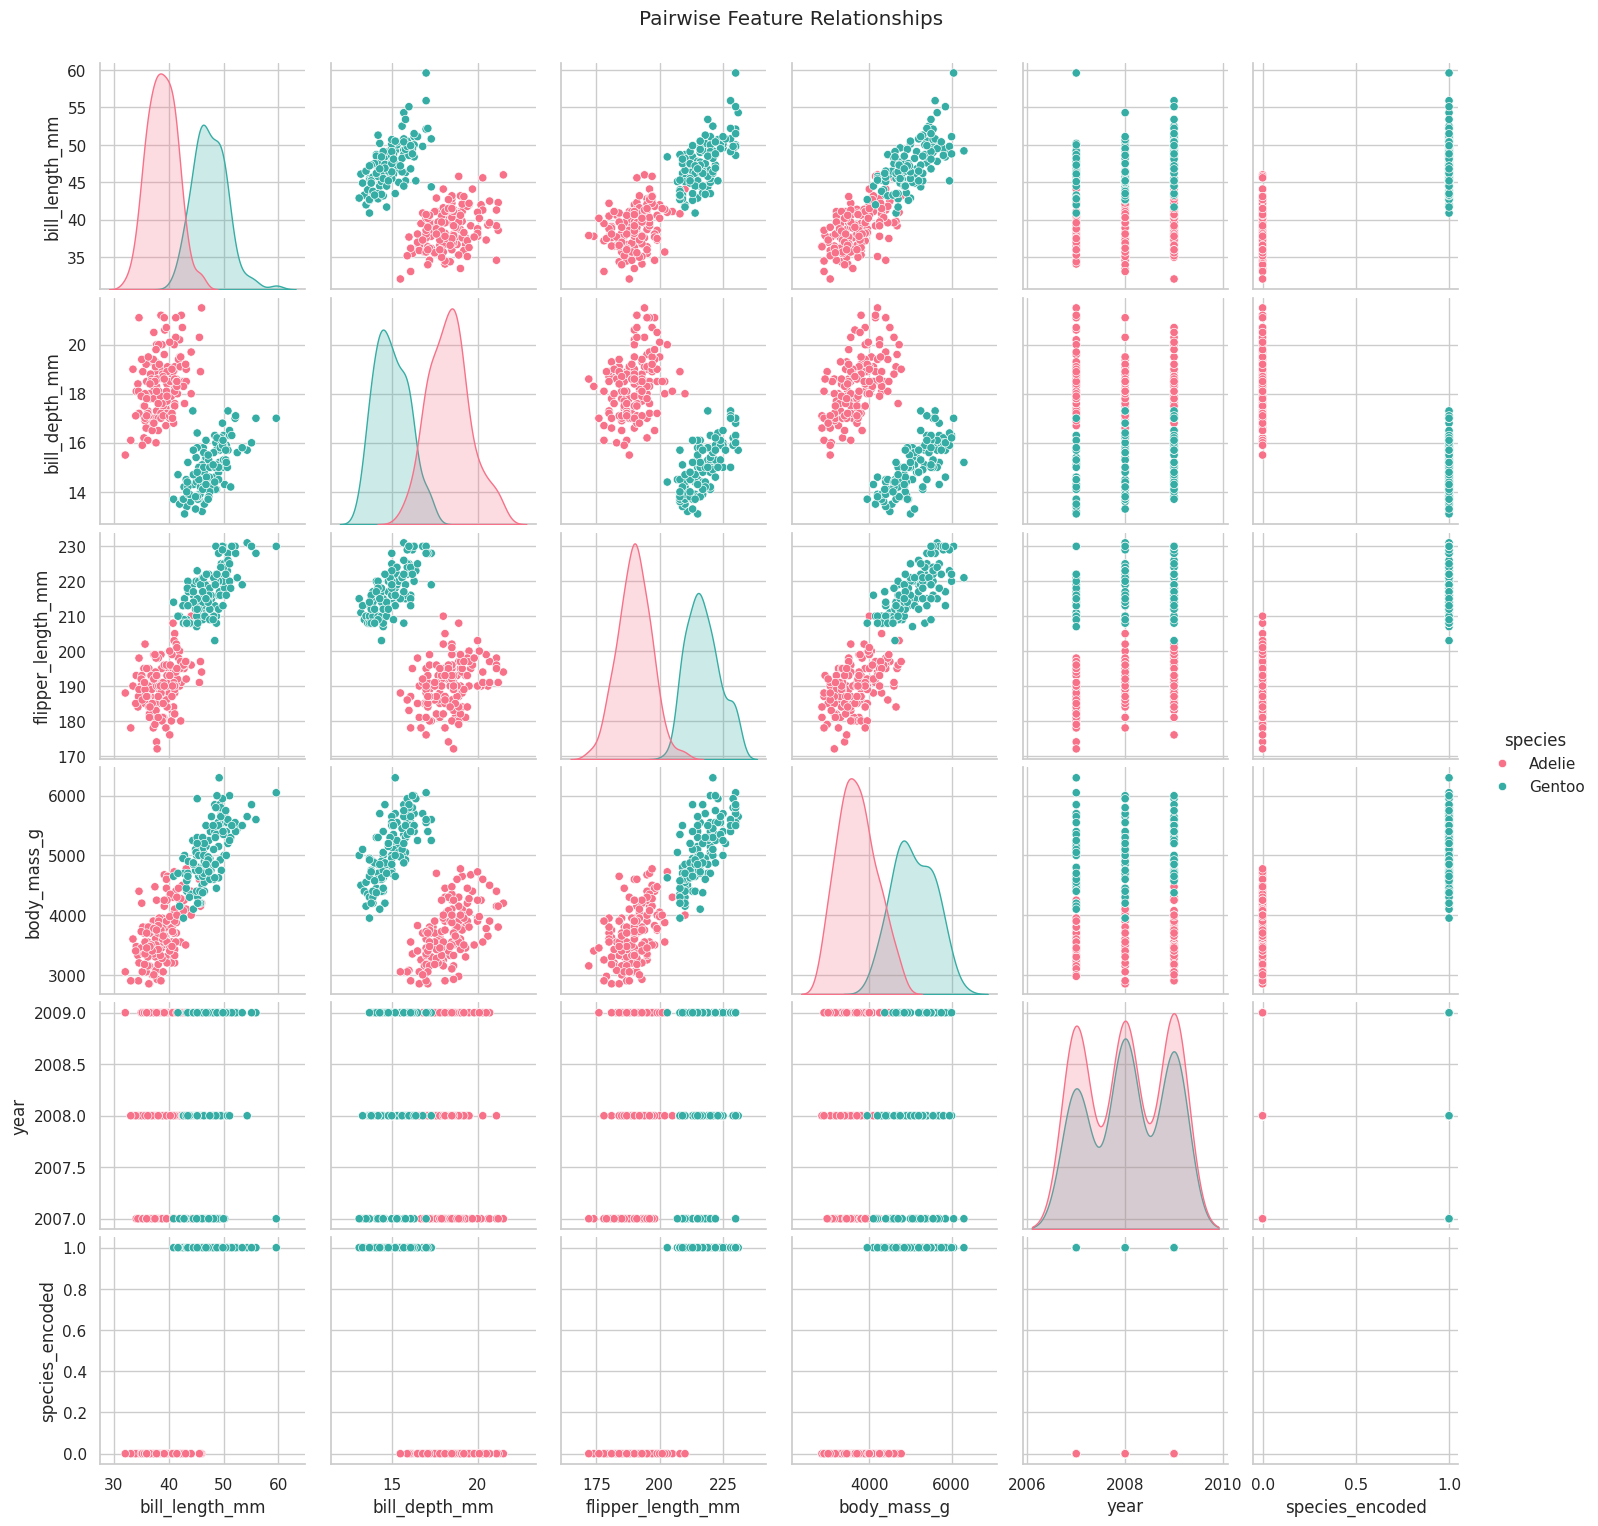

In [21]:
sns.pairplot(data, hue='species', diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

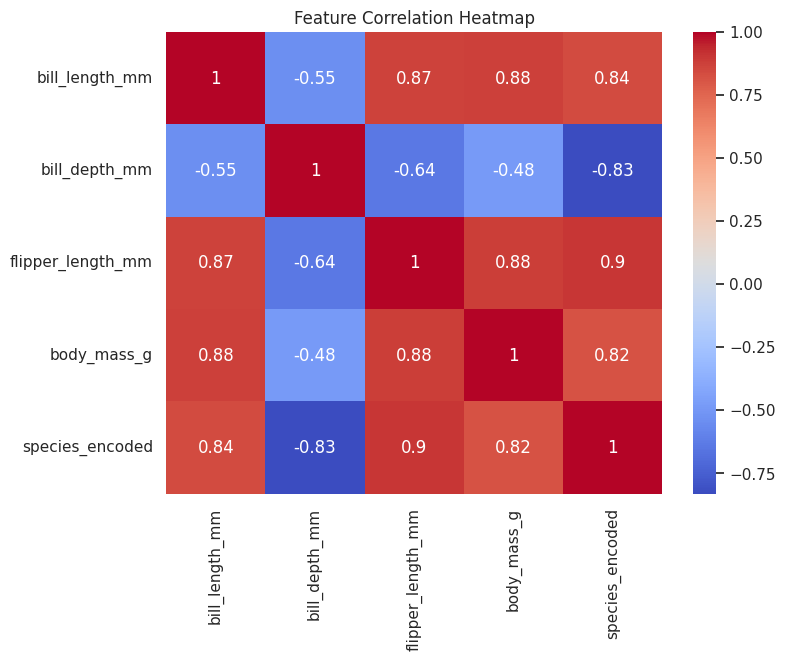

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.drop(columns=['species', 'year']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature Scaling

Before training the model, it's important to **scale down the features** so that they are on a similar scale. This helps:

- Prevent features with larger numeric ranges from dominating the learning process
- Improve the performance and convergence speed of many machine learning algorithms (e.g., Naive Bayes, SVM, KNN)
- Make the model more stable and accurate

In this project, we can apply standard scaling or minmax scaling to bring the feature values into a consistent range.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)
X

array([[0.25454545, 0.66666667, 0.15254237, 0.26086957, 0.        ,
        0.        ],
       [0.26909091, 0.51190476, 0.23728814, 0.27536232, 0.        ,
        0.        ],
       [0.29818182, 0.58333333, 0.38983051, 0.11594203, 0.        ,
        0.        ],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84057971, 1.        ,
        1.        ],
       [0.47636364, 0.20238095, 0.6779661 , 0.68115942, 1.        ,
        1.        ],
       [0.64727273, 0.35714286, 0.69491525, 0.73913043, 1.        ,
        1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42)

##  Naive Bayes Classifier and Its Variants

The **Naive Bayes classifier** is a family of simple yet powerful probabilistic classifiers based on **Bayes’ Theorem**. It assumes that all features are **independent** of each other given the class label — an assumption often called "naive."

Despite this simplification, Naive Bayes often performs surprisingly well in real-world applications, especially in **text classification, spam detection**, and **medical diagnosis**.



---

### 🧪 Variants of Naive Bayes

#### 1. **Gaussian Naive Bayes**
- Assumes that the features follow a **normal (Gaussian)** distribution.
- Suitable for **continuous features**, like height, weight, or biometric measurements.
- Example use case: **Iris dataset**, **Penguin classification**

#### 2. **Bernoulli Naive Bayes**
- Designed for **binary/boolean features** (0 or 1).
- Commonly used for **text classification** with features indicating the **presence or absence of a word**.
- Example use case: **Spam vs. Ham email classification**

#### 3. **Multinomial Naive Bayes**
- Used for **count-based features**, such as word frequencies in text.
- Best suited for **document classification**, **sentiment analysis**, or **language modeling**.
- Example use case: **News article classification** based on word occurrences

---


In this project, we use **Gaussian Naive Bayes** because our input features (e.g., bill length, flipper length) are **continuous numeric values**.


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_predict=nb.predict(X_test)
y_predict

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

Accuracy score: 1.0
Confusion matrix:
  [[30  0]
 [ 0 25]]
Clasiffication report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



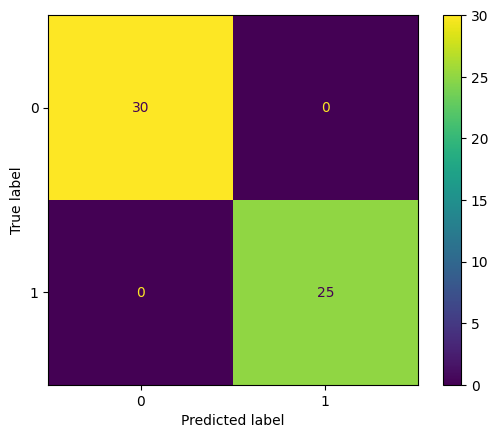

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
a=accuracy_score(y_test,y_predict)
print('Accuracy score:',a)
cm=confusion_matrix(y_test,y_predict)
print('Confusion matrix:\n ',cm)
cr=classification_report(y_test,y_predict)
print('Clasiffication report:\n',cr)
cf=ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
print(cf)


##  Conclusion

The Naive Bayes classifier achieved an **accuracy score of 1.0 (100%)** in predicting the penguin species (Adelie and Gentoo). The **confusion matrix** shows perfect classification with no misclassified samples — all 30 Adelie and 25 Gentoo penguins were correctly identified.

The **classification report** confirms this with a precision, recall, and F1-score of **1.00 for both classes**, indicating that the model made no errors during prediction.

Such perfect performance may be due to:
- Clear and **well-separated features** in the dataset (e.g., bill length, flipper length, and body mass) that distinguish the two species easily.
- A **balanced and clean dataset** with no missing or noisy data.
- The simplicity and suitability of the **Gaussian Naive Bayes** model for this kind of continuous, normally distributed feature set.

Overall, the model fits the dataset extremely well, making it highly accurate for this binary classification task.
